In [1]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [3]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

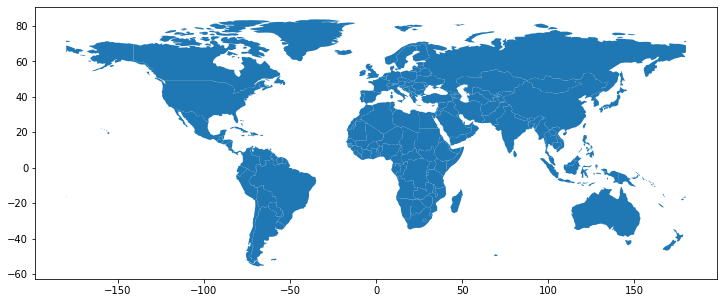

In [13]:
plt.rcParams["figure.figsize"] = (20,5) #increasing figure size from default
world.plot()

#### Examining country GeoDataFrame

In [14]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 176 entries, 0 to 176
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pop_est      139 non-null    float64 
 1   continent    176 non-null    object  
 2   name         176 non-null    object  
 3   iso_a3       176 non-null    object  
 4   gdp_md_est   176 non-null    float64 
 5   geometry     176 non-null    geometry
 6   gdp_per_cap  176 non-null    float64 
dtypes: float64(3), geometry(1), object(3)
memory usage: 15.1+ KB


<AxesSubplot:>

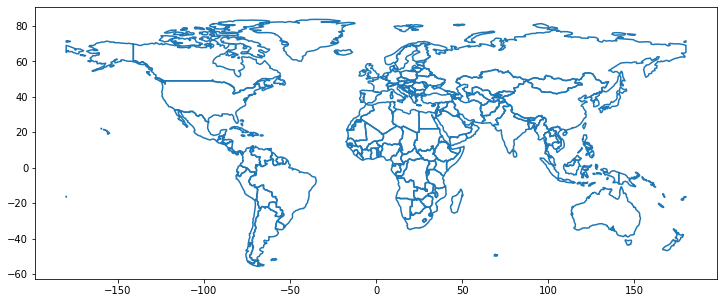

In [15]:
world.boundary.plot()

C:\Python39\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


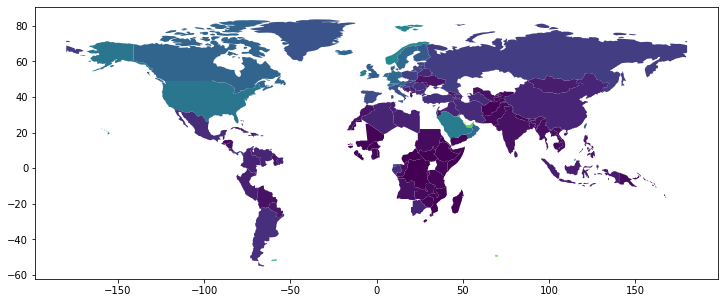

In [16]:
#Through Chloropeth Mapping

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap');

#### Creating legends on map with population_estimates

<AxesSubplot:>

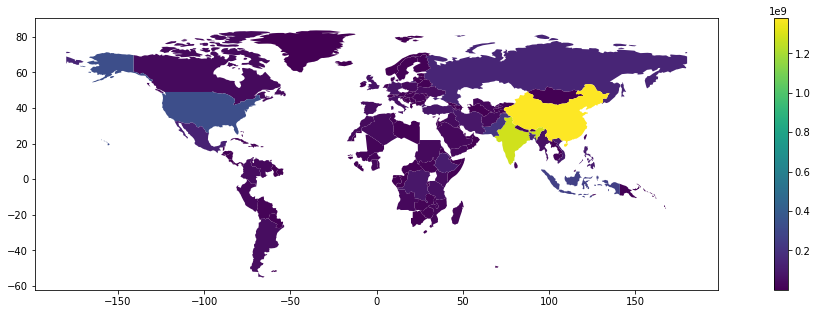

In [17]:
fig, ax = plt.subplots(1,1)
world.plot(column='pop_est', ax=ax, legend=True)

<AxesSubplot:>

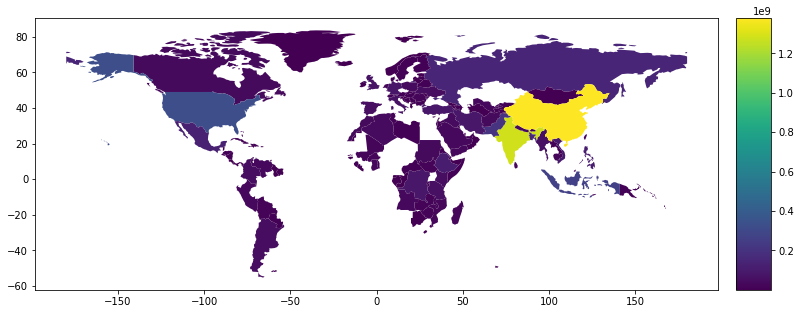

<Figure size 360x360 with 0 Axes>

In [18]:
# Plotting further ahead with improved accurate legend
# for the world population estimates

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1,1)
fig.subplots_adjust(wspace=2.5)
plt.figure(figsize=(5,5))


divider = make_axes_locatable(ax)
# Add an axes to the right of the main axes.
cax = divider.append_axes("right",size="5%",pad=0.1)
world.plot(column='pop_est',ax=ax, legend=True, cax=cax)

#### GDP per capita for each country

<AxesSubplot:>

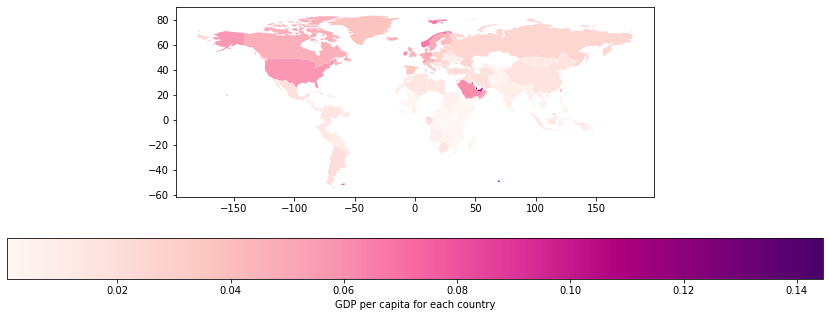

In [19]:
fig, ax = plt.subplots(1,1)

world.plot(column='gdp_per_cap', cmap='RdPu',
          ax=ax,
          legend=True,
          legend_kwds={'label':"GDP per capita for each country",
                          'orientation':'horizontal'})

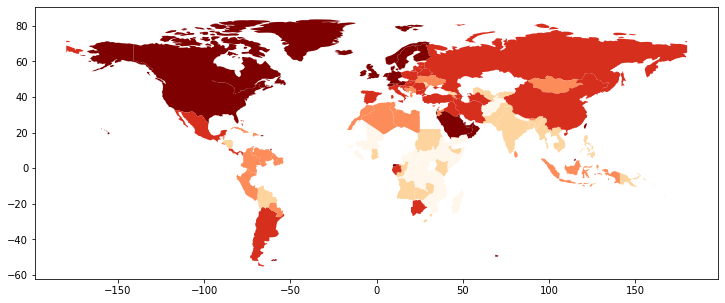

In [20]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

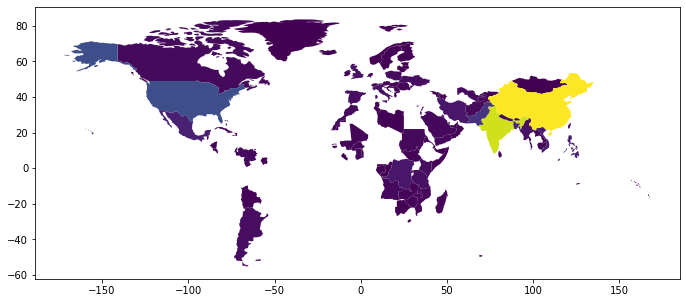

In [21]:
#Missing Data

world.loc[np.random.choice(world.index, 40), 'pop_est'] = np.nan
world.plot(column='pop_est');

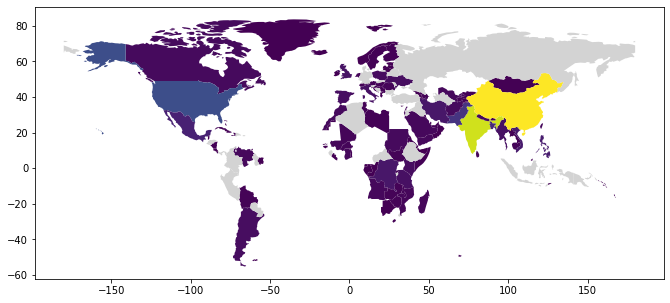

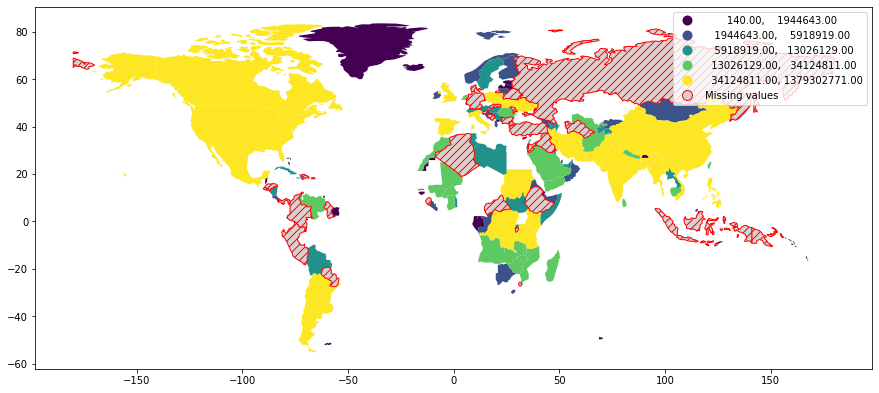

In [22]:
world.plot(column='pop_est', missing_kwds={'color': 'lightgrey'});

world.plot(
    column="pop_est",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);